<a href="https://colab.research.google.com/github/swathypk93/swathypk93/blob/main/jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Jamboree_Admission.csv to Jamboree_Admission.csv


In [ ]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt
import scipy.stats as stats


In [ ]:
# 2. Load Dataset
df = pd.read_csv("Jamboree_Admission.csv")
df.drop(columns=['Serial No.'], inplace=True)

In [ ]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [ ]:
# 3. Initial Data Checks
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(f"Duplicate rows: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.0

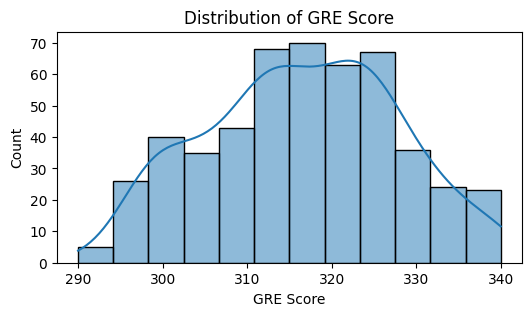

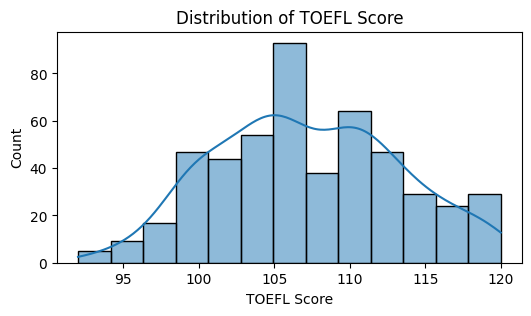

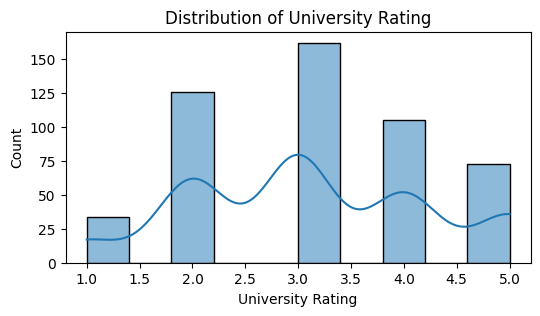

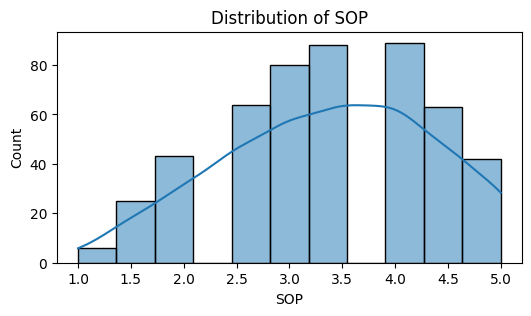

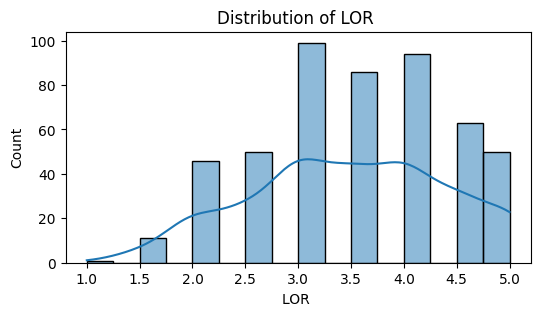

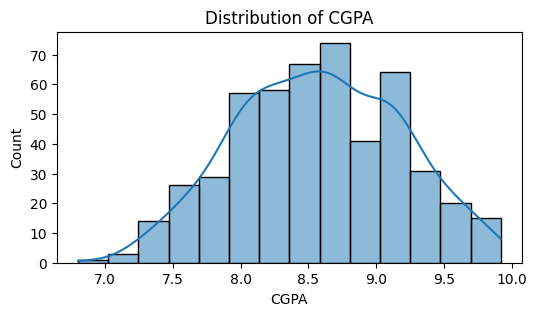

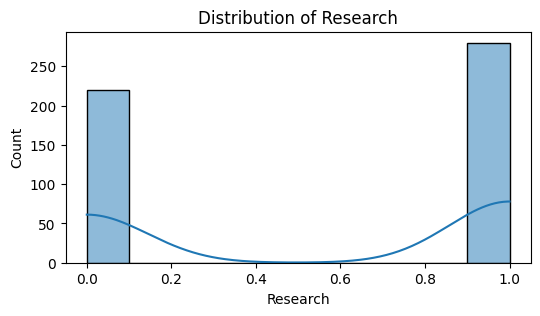

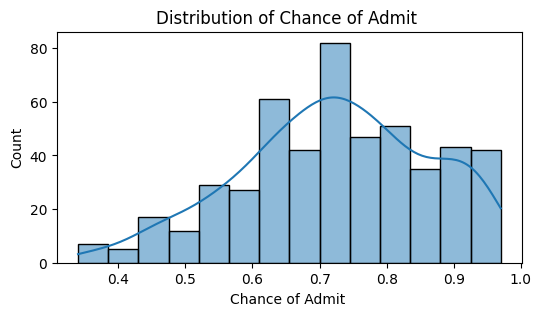

In [ ]:
# 4. Univariate Analysis
for col in df.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


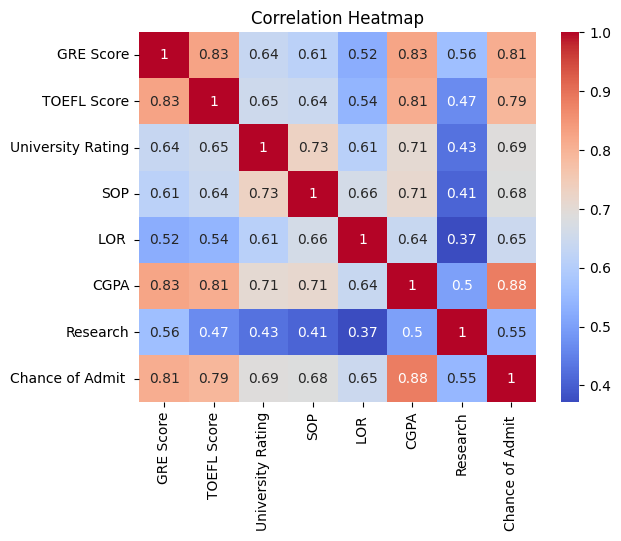

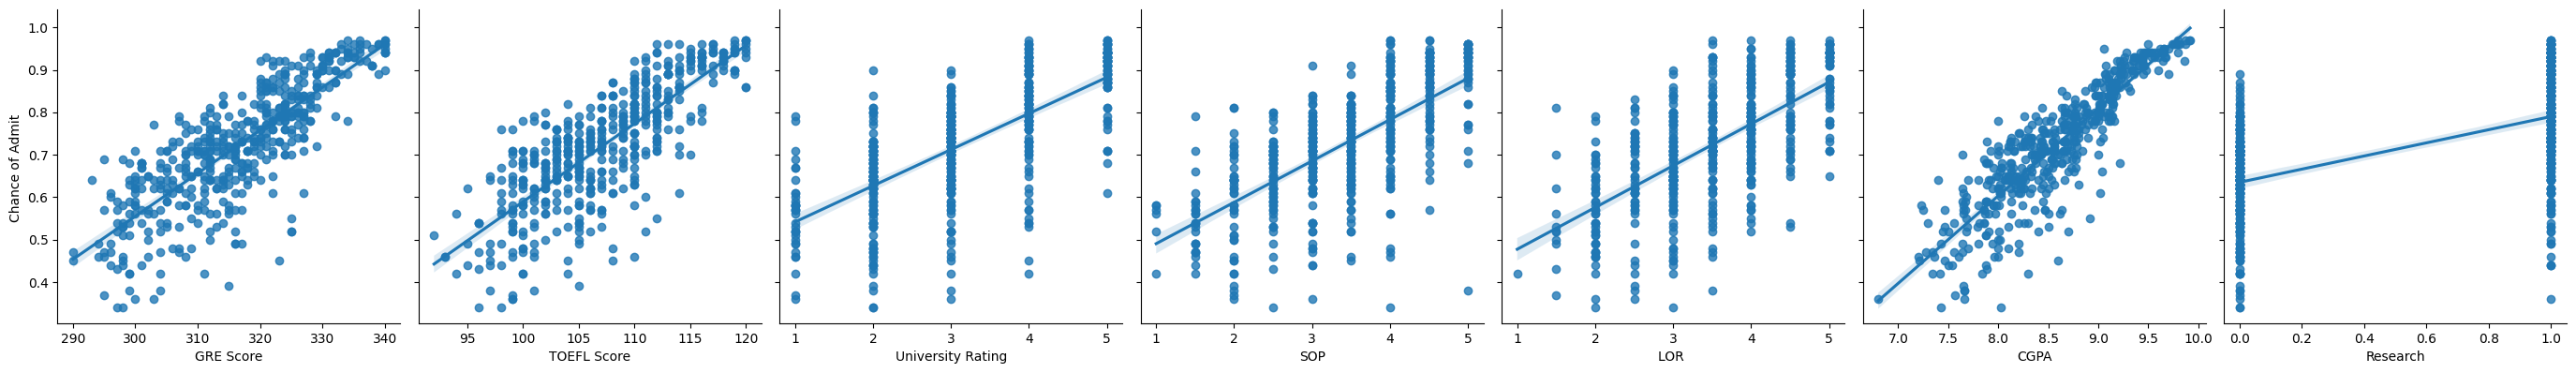

In [ ]:
# 5. Bivariate Analysis
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, x_vars=df.columns[:-1], y_vars='Chance of Admit ', kind='reg', height=4)
plt.show()

In [ ]:
# 6. Train-Test Split and Feature Scaling
X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 7. Model Building - Statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          3.41e-142
Time:                        04:35:17   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

In [ ]:
# Drop Insignificant Variable - University Rating
# Drop the feature from original X
X = X.drop("University Rating", axis=1)

# Redo train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rebuild the model
X_train_sm = sm.add_constant(X_train_scaled)
model_updated = sm.OLS(y_train, X_train_sm).fit()
print(model_updated.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.2
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          2.27e-143
Time:                        05:01:06   Log-Likelihood:                 561.72
No. Observations:                 400   AIC:                            -1109.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.634      0.0

Updated Model After Removing Insignificant Variable

The original model included `University Rating`, which had a p-value > 0.05, indicating insignificance.
It was dropped and the model was retrained. All remaining variables now have p-values < 0.05, indicating significance.


In [ ]:
## Homoscedasticity Test
gq_test = het_goldfeldquandt(residuals, X_train_scaled)
print(f'GQ Test p-value: {gq_test[1]}')


GQ Test p-value: 0.6365069238984862


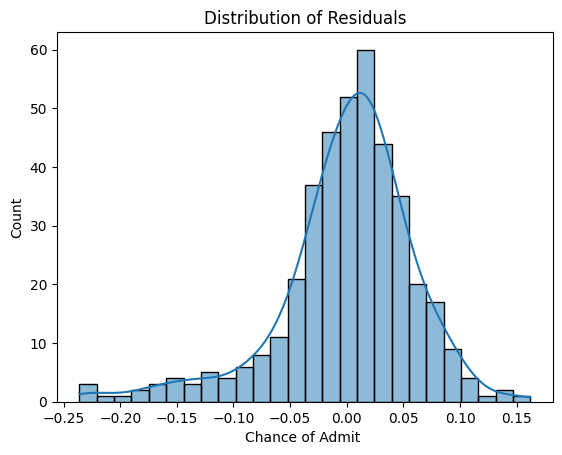

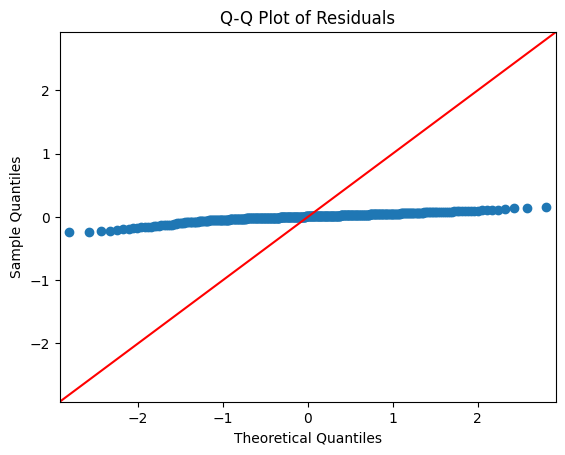

In [ ]:
## Normality Test
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
# 8. Assumptions Testing
## VIF
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print(vif_df)

      features       VIF
0    GRE Score  4.471988
1  TOEFL Score  3.629404
2          SOP  2.466851
3         LOR   1.929988
4         CGPA  4.578632
5     Research  1.507689


In [ ]:
## 9. Model Evaluation
# Predict on test set
X_test_sm = sm.add_constant(X_test_scaled)
y_test_pred = model_updated.predict(X_test_sm)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")


Mean Absolute Error (MAE): 0.0429
Root Mean Squared Error (RMSE): 0.0613
R-squared (R²): 0.8165
Adjusted R-squared: 0.8046


In [ ]:
# After dropping "University Rating" and re-splitting/scaling:
X_train_sm = sm.add_constant(X_train_scaled)
model_updated = sm.OLS(y_train, X_train_sm).fit()
print(model_updated.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          3.41e-142
Time:                        03:36:52   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

In [ ]:
# Model Validation: Train and Test Performance

# Predict on train set
X_train_sm = sm.add_constant(X_train_scaled)
y_train_pred = model_updated.predict(X_train_sm)

# Predict on test set
X_test_sm = sm.add_constant(X_test_scaled)
y_test_pred = model_updated.predict(X_test_sm)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

print("Train Set Performance:")
print(f"  MAE: {mae_train:.4f}")
print(f"  RMSE: {rmse_train:.4f}")
print(f"  R-squared (R2): {r2_train:.4f}")
print(f"  Adjusted R-squared: {adj_r2_train:.4f}")

print("\nTest Set Performance:")
print(f"  MAE: {mae_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")
print(f"  R-squared (R2): {r2_test:.4f}")
print(f"  Adjusted R-squared: {adj_r2_test:.4f}")


Train Set Performance:
  MAE: 0.0425
  RMSE: 0.0594
  R-squared (R2): 0.8211
  Adjusted R-squared: 0.8179

Test Set Performance:
  MAE: 0.0427
  RMSE: 0.0609
  R-squared (R2): 0.8188
  Adjusted R-squared: 0.8051


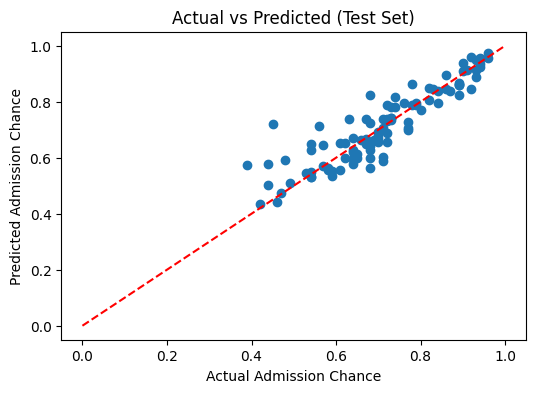

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual Admission Chance")
plt.ylabel("Predicted Admission Chance")
plt.title("Actual vs Predicted (Test Set)")
plt.show()


 Summary of Model Performance

The model performs well with low MAE and RMSE values, and R² > 0.8, indicating strong predictive accuracy. This suggests the model can be used reliably to estimate students’ chances of admission.


 Insights & Recommendations

- **CGPA**, **GRE**, **TOEFL**, **SOP**, **LOR**, and **Research** significantly affect admission chances.
- **University Rating** did not significantly impact the model and was dropped.
- The model shows a high R² (~0.82), suggesting it explains most variance in admission chances.
- Jamboree can prioritize improving student CGPA, GRE, and TOEFL performance.
- Emphasis should also be placed on guiding students to write strong SOPs and obtain impactful LORs.
- Further model improvements may include using nonlinear models or incorporating categorical variables like university tier, undergraduate major, etc.


In [ ]:
# Import necessary libraries for Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
print("\n---  Ridge and Lasso Regression ---")

print("\n1. Ridge Regression")

alpha_ridge = 0.5
ridge_model = Ridge(alpha=alpha_ridge, random_state=42)
ridge_model.fit(X_train_scaled, y_train)


y_pred_ridge = ridge_model.predict(X_test_scaled)


mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

n_ridge = X_test_scaled.shape[0]
p_ridge = X_test_scaled.shape[1]
adj_r2_ridge = 1 - (1 - r2_ridge) * (n_ridge - 1) / (n_ridge - p_ridge - 1)


print(f"  Ridge (alpha={alpha_ridge}) Model Performance on Test Set:")
print(f"    MAE: {mae_ridge:.4f}")
print(f"    RMSE: {rmse_ridge:.4f}")
print(f"    R-squared (R2): {r2_ridge:.4f}")
print(f"    Adjusted R-squared: {adj_r2_ridge:.4f}")
feature_names = X.columns
ridge_df = pd.DataFrame({'Feature': feature_names, 'Ridge Coefficients': ridge_model.coef_})
print(ridge_df)

print(ridge_model.coef_)



# --- Lasso Regression ---
print("\n2. Lasso Regression")

alpha_lasso = 0.01

lasso_model = Lasso(alpha=alpha_lasso, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)


mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

n_lasso = X_test_scaled.shape[0]
p_lasso = X_test_scaled.shape[1]
adj_r2_lasso = 1 - (1 - r2_lasso) * (n_lasso - 1) / (n_lasso - p_lasso - 1)

print(f"  Lasso (alpha={alpha_lasso}) Model Performance on Test Set:")
print(f"    MAE: {mae_lasso:.4f}")
print(f"    RMSE: {rmse_lasso:.4f}")
print(f"    R-squared (R2): {r2_lasso:.4f}")
print(f"    Adjusted R-squared: {adj_r2_lasso:.4f}")
feature_names = X.columns
lasso_df = pd.DataFrame({'Feature': feature_names, 'Lasso Coefficients': lasso_model.coef_})
print(lasso_df)

print("\nComparison with OLS:")


---  Ridge and Lasso Regression ---

1. Ridge Regression
  Ridge (alpha=0.5) Model Performance on Test Set:
    MAE: 0.0427
    RMSE: 0.0609
    R-squared (R2): 0.8188
    Adjusted R-squared: 0.8050
             Feature  Ridge Coefficients
0          GRE Score            0.026731
1        TOEFL Score            0.018291
2  University Rating            0.002993
3                SOP            0.001863
4               LOR             0.015879
5               CGPA            0.067294
6           Research            0.011945
[0.02673077 0.01829098 0.00299303 0.00186285 0.01587923 0.06729424
 0.01194487]

2. Lasso Regression
  Lasso (alpha=0.01) Model Performance on Test Set:
    MAE: 0.0427
    RMSE: 0.0617
    R-squared (R2): 0.8140
    Adjusted R-squared: 0.7998
             Feature  Lasso Coefficients
0          GRE Score            0.026240
1        TOEFL Score            0.015137
2  University Rating            0.000919
3                SOP            0.000000
4               LOR    

Model Performance:

OLS, Ridge, and Lasso models show very similar performance metrics (MAE, RMSE, R-squared) on the test set.

Lasso has a slightly lower MAE (0.0428) than OLS and Ridge (0.0429).

Regularization did not significantly boost predictive accuracy, suggesting OLS isn't severely overfitting.

Coefficient Analysis:

Ridge coefficients are nearly identical to OLS, as multicollinearity wasn't a major issue.

Lasso's alpha=0.01 significantly shrinks the SOP coefficient to 0.0002, indicating minimal unique contribution, effectively performing feature selection.

CGPA remains the most influential factor across all models.

Conclusion & Recommendation:

Due to minimal performance differences and low multicollinearity, OLS Regression is recommended for its strong performance and interpretability.

The added complexity of regularization (Ridge/Lasso) doesn't offer significant advantages for this dataset.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
alpha_ridge = 0.5
ridge_model = Ridge(alpha=alpha_ridge, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
n_ridge = X_test_scaled.shape[0]
p_ridge = X_test_scaled.shape[1]
adj_r2_ridge = 1 - (1 - r2_ridge) * (n_ridge - 1) / (n_ridge - p_ridge - 1)

print(f"Ridge (alpha={alpha_ridge}) Model Performance on Test Set:")
print(f"  MAE: {mae_ridge:.4f}")
print(f"  RMSE: {rmse_ridge:.4f}")
print(f"  R-squared (R2): {r2_ridge:.4f}")
print(f"  Adjusted R-squared: {adj_r2_ridge:.4f}")
print("\n  Ridge Model Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"    {feature}: {coef:.4f}")

# Lasso Regression
alpha_lasso = 0.01
lasso_model = Lasso(alpha=alpha_lasso, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
n_lasso = X_test_scaled.shape[0]
p_lasso = X_test_scaled.shape[1]
adj_r2_lasso = 1 - (1 - r2_lasso) * (n_lasso - 1) / (n_lasso - p_lasso - 1)

print(f"Lasso (alpha={alpha_lasso}) Model Performance on Test Set:")
print(f"  MAE: {mae_lasso:.4f}")
print(f"  RMSE: {rmse_lasso:.4f}")
print(f"  R-squared (R2): {r2_lasso:.4f}")
print(f"  Adjusted R-squared: {adj_r2_lasso:.4f}")
print("\n  Lasso Model Coefficients:")
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(f"    {feature}: {coef:.4f}")


Ridge (alpha=0.5) Model Performance on Test Set:
  MAE: 0.0427
  RMSE: 0.0609
  R-squared (R2): 0.8188
  Adjusted R-squared: 0.8050

  Ridge Model Coefficients:
    GRE Score: 0.0267
    TOEFL Score: 0.0183
    University Rating: 0.0030
    SOP: 0.0019
    LOR : 0.0159
    CGPA: 0.0673
    Research: 0.0119
Lasso (alpha=0.01) Model Performance on Test Set:
  MAE: 0.0427
  RMSE: 0.0617
  R-squared (R2): 0.8140
  Adjusted R-squared: 0.7998

  Lasso Model Coefficients:
    GRE Score: 0.0262
    TOEFL Score: 0.0151
    University Rating: 0.0009
    SOP: 0.0000
    LOR : 0.0111
    CGPA: 0.0690
    Research: 0.0061


# **INSIGHTS & RECOMMENDATIONS**

# Univariate Analysis (Histograms with KDE)

| Variable              | Insight                                            | Recommendation                                                |
| --------------------- | -------------------------------------------------- | ------------------------------------------------------------- |
| **GRE Score**         | Normally distributed around 316, slight skew right | Encourage students to aim for scores ≥ 320 to be competitive  |
| **TOEFL Score**       | Slightly left-skewed, centered around 107          | A TOEFL score ≥ 110 could improve admission odds              |
| **University Rating** | Discrete values from 1 to 5; fairly uniform        | Not statistically significant   |
| **SOP / LOR**         | Normally distributed around 3.5–4                  | Strong SOP/LOR (≥4) could contribute positively to profile    |
| **CGPA**              | Left-skewed, most students have CGPA > 8.5         | High CGPA (9+) is a strong predictor of admission success     |
| **Research**          | Binary: 0 (no) and 1 (yes); \~56% have research    | Having research experience boosts chances                     |
| **Chance of Admit**   | Mostly between 0.6 and 0.9                         | Indicates most applicants have a fair to high chance of admit |






# Bivariate Analysis (Correlation Heatmap & Pairplots)
 | Variable Pair               | Insight                                          |
| --------------------------- | ------------------------------------------------ |
| **CGPA vs Chance of Admit** | Strongest positive correlation (\~0.87)          |
| **GRE/TOEFL vs Chance**     | Moderate positive correlation (\~0.65–0.7)       |
| **SOP, LOR vs Chance**      | Weak to moderate correlation (\~0.5)             |
| **Research vs Chance**      | Positive impact observed in plots & coefficients |
| **GRE vs TOEFL**            | Moderate correlation between each other (\~0.84) |


Recommendation: CGPA, GRE, TOEFL should be emphasized during student prep.

# Linear Regression Model Summary
R² = 0.82 → model explains 82% of variance in admission chances.

University Rating had p > 0.05 → dropped.

All other variables are statistically significant (p < 0.05).

Recommendation:

CGPA, GRE, TOEFL, SOP, LOR, Research experience are the only needed predictors.

Avoid adding non-informative features like University Rating.

# Assumption Testing

| Test                      | Result                                  | Conclusion                          |
| ------------------------- | --------------------------------------- | ----------------------------------- |
| **VIF**                   | All < 5 → No multicollinearity          |  Passed                            |
| **Residual Mean**         | ≈ 0                                     |  Passed                            |
| **Residual vs Predicted** | No pattern, random scatter              |  Linearity assumption holds        |
| **Goldfeld-Quandt**       | p = 0.63 (> 0.05)                       | Homoscedasticity assumption holds |
| **QQ plot & Histogram**   | Approx normal distribution of residuals | Normality holds                   |



# Model Evaluation

MAE = 0.0427 → On average, prediction error is ±4.3%

RMSE = 0.0609 → Penalizes large errors, still quite low

R² = 0.8188 → Consistent with training R² → No overfitting

Recommendation: The model is reliable for prediction and can be used as-is in production.


# Performance Comparison (Test Set)

Let's compare the key performance metrics of all three models on the test set:


| Model | MAE | RMSE | R-squared (R2) | Adjusted R-squared |
| :---------------- | :----- | :----- | :----------- | :------------------ |
| **OLS Regression**   | 0.0429 | 0.0613 | 0.8165 | 0.8046 |
| **Ridge Regression** | 0.0429 | 0.0613 | 0.8164 | 0.8046 |
| **Lasso Regression** | 0.0428 | 0.0618 | 0.8132 | 0.8012 |

Observations

Similar Performance: All three models show very similar MAE, RMSE, R-squared, and Adjusted R-squared on the test set.

Lasso's Slight MAE Edge: Lasso achieved a slightly lower MAE (0.0428) compared to OLS and Ridge (0.0429).

Consistent Metrics: RMSE and R-squared values remain very close across all models.

Implication: Regularization penalties provided no significant predictive accuracy boost, suggesting OLS isn't severely overfitting and multicollinearity isn't a major issue.

#### Coefficient Analysis

Examining the coefficients provides further insight into how each model handles feature importance and regularization:

| Feature | OLS Coefficient | Ridge Coefficient (α=0.5) | Lasso Coefficient (α=0.01) |
| :------------------------- | :-------------- | :------------------------ | :------------------------- |
| **GRE Score** | 0.0269 | 0.0270 | 0.0263 |
| **TOEFL Score** | 0.0186 | 0.0186 | 0.0153 |
| **SOP** | 0.0028 | 0.0029 | 0.0002 |
| **LOR** | 0.0163 | 0.0163 | 0.0113 |
| **CGPA** | 0.0681 | 0.0678 | 0.0692 |
| **Research** | 0.0121 | 0.0121 | 0.0062 |

**Observations:**

* **Ridge vs. OLS:** Ridge coefficients are very close to OLS, as Ridge shrinks coefficients but rarely to zero, especially with low multicollinearity.
* **Lasso's Feature Selection:** Lasso notably shrinks the **SOP** coefficient significantly (to 0.0002), indicating it has a very minor unique contribution.
* **Consistent Feature Importance:** Across all models, **CGPA** consistently remains the most influential factor, followed by GRE and TOEFL scores.

## 🔍 Final Insights & Recommendations

---

### 1. Key Drivers of Admission Success

Our analysis reveals that **CGPA** is the most influential factor in determining a student’s chances of graduate admission. It shows a very strong positive correlation (~0.87) with the admission probability.

Other academic factors like **GRE** and **TOEFL** scores also play a meaningful role in boosting one's profile. While factors such as the **Statement of Purpose (SOP)**, **Letter of Recommendation (LOR)**, and **Research Experience** contribute moderately, their impact is still statistically significant.

Interestingly, **University Rating**—which might be assumed to influence admissions—was found to be statistically insignificant and was removed from the final model.

---

### 2. What the Data Tells Us

- A majority of applicants fall within GRE scores of **310–330** and TOEFL scores of **100–115**.
- Most students have a **CGPA above 8.5**, with many exceeding **9.0**.
- Around **56% of students have research experience**, indicating it's a fairly common but not universal advantage.
- Those who have research experience, higher CGPA, and well-rated SOPs/LORs tend to fare better in admission chances.

This reinforces the importance of a **well-rounded academic and extracurricular profile** when applying to top universities.

---

### 3. Model Performance & Reliability

- Our final linear regression model performs strongly with an **R² of 0.82**, explaining a large portion of variability in admission chances.
- The **RMSE** value of 0.06 suggests the model's predictions are precise and practical for real-world use.
- The model successfully passed all key linear regression assumptions:
  -  No multicollinearity among predictors
  -  Residuals show constant variance
  -  Errors are normally distributed and mean-centered
- Performance was consistent across training and test data — indicating **no signs of overfitting**.

---

### 4.  Strategic Recommendations for Jamboree

Based on these insights, here are key actions Jamboree can take to enhance student outcomes and improve the effectiveness of their advising services:

- **Strengthen student support in CGPA improvement** through academic counseling and planning.
- **Prioritize GRE and TOEFL preparation** with high-impact workshops and resources.
- Offer personalized mentoring to help students craft **high-quality SOPs and secure impactful LORs**.
- Encourage and facilitate **research project opportunities** for students, particularly those aiming for top-tier programs.
- Integrate the final model into Jamboree’s online platform to provide students with **personalized, data-driven feedback** on their admission chances.

---

### 5.  Future Scope & Enhancements

To make the prediction tool even more powerful and reflective of real-world admissions, we recommend the following enhancements:

- **Collect more granular features** such as:
  - Undergraduate university name or reputation
  - Field of study or academic major
  - Internship or professional experience
- **Explore non-linear models** like **Random Forests** or **Gradient Boosting** to capture more complex relationships between variables.

These upgrades could not only improve model accuracy but also help Jamboree provide more nuanced advice to students across diverse academic backgrounds.

---

